# Thomas Sampling

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Dataset/upper_confidence_bound/Ads_CTR_Optimisation.csv')



## Implementing Thomas Sampling

In [11]:
import random
N = 500
d = 10 
ads_selected = []

number_of_rewards_0 =[0] * d 
number_of_rewards_1 =[0] * d

total_reward = 0

for n in range(0,N):
    ad = 0 
    max_random = 0
    for i in range(0,d):
      random_beta = random.betavariate(number_of_rewards_1[i]+1 , number_of_rewards_0[i] + 1)
      
      if(random_beta > max_random):
        max_random = random_beta 
        ad  = i 
    ads_selected.append(ad)
    reward = dataset.values[n,ad]
    if( reward == 0): 
      number_of_rewards_0[ad] += 1
    else: 
      number_of_rewards_1[ad] += 1
    total_reward += reward




## Visualising the results - Histogram


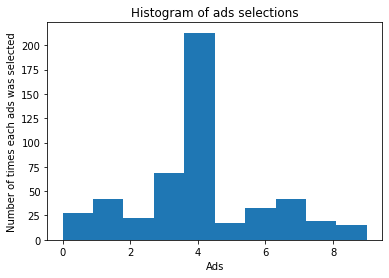

In [12]:
plt.hist(ads_selected)
plt.title("Histogram of ads selections")
plt.xlabel('Ads')
plt.ylabel('Number of times each ads was selected')
plt.show()